In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Install Model maker
!pip install -q tflite-model-maker &> /dev/null

In [2]:
# Imports and check that we are using TF2.x
import numpy as np
import os

from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

import tensorflow as tf
assert tf.__version__.startswith('2')
tf.get_logger().setLevel('ERROR')

In [7]:
data_path = "/content/drive/MyDrive/Colab Notebooks/flower_photos"

In [8]:
data = DataLoader.from_folder(data_path)
train_data, test_data = data.split(0.9)

In [10]:
train_data

In [21]:
def showSample(data):

    plt.figure(figsize=(10,10))
    for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image.numpy(), cmap=plt.cm.gray)
        plt.xlabel(data.index_to_label[label.numpy()])
    plt.show()

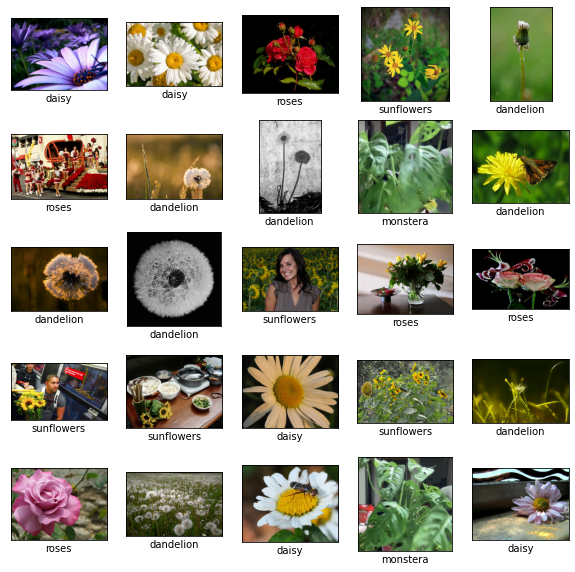

In [22]:
showSample(data)

In [23]:
print("The number of Data = ", len(data))
print("The number of Train Data = ", len(train_data))
print("The number of Test Data = ", len(test_data))

The number of Data =  4669
The number of Train Data =  4202
The number of Test Data =  467


In [25]:
model = image_classifier.create(train_data)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
131/131 [==============================] - 1133s 9s/step - loss: 0.8420 - accuracy: 0.8154
Epoch 2/5
131/131 [==============================] - 20s 149ms/step - loss: 0.6471 - accuracy: 0.9146
Epoch 3/5
131/131 [===========

In [26]:
loss, accuracy = model.evaluate(test_data)

15/15 [==============================] - 145s 9s/step - loss: 0.6140 - accuracy: 0.9315


In [28]:
model.export(export_dir='/content/drive/MyDrive/Colab Notebooks/', with_metadata=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


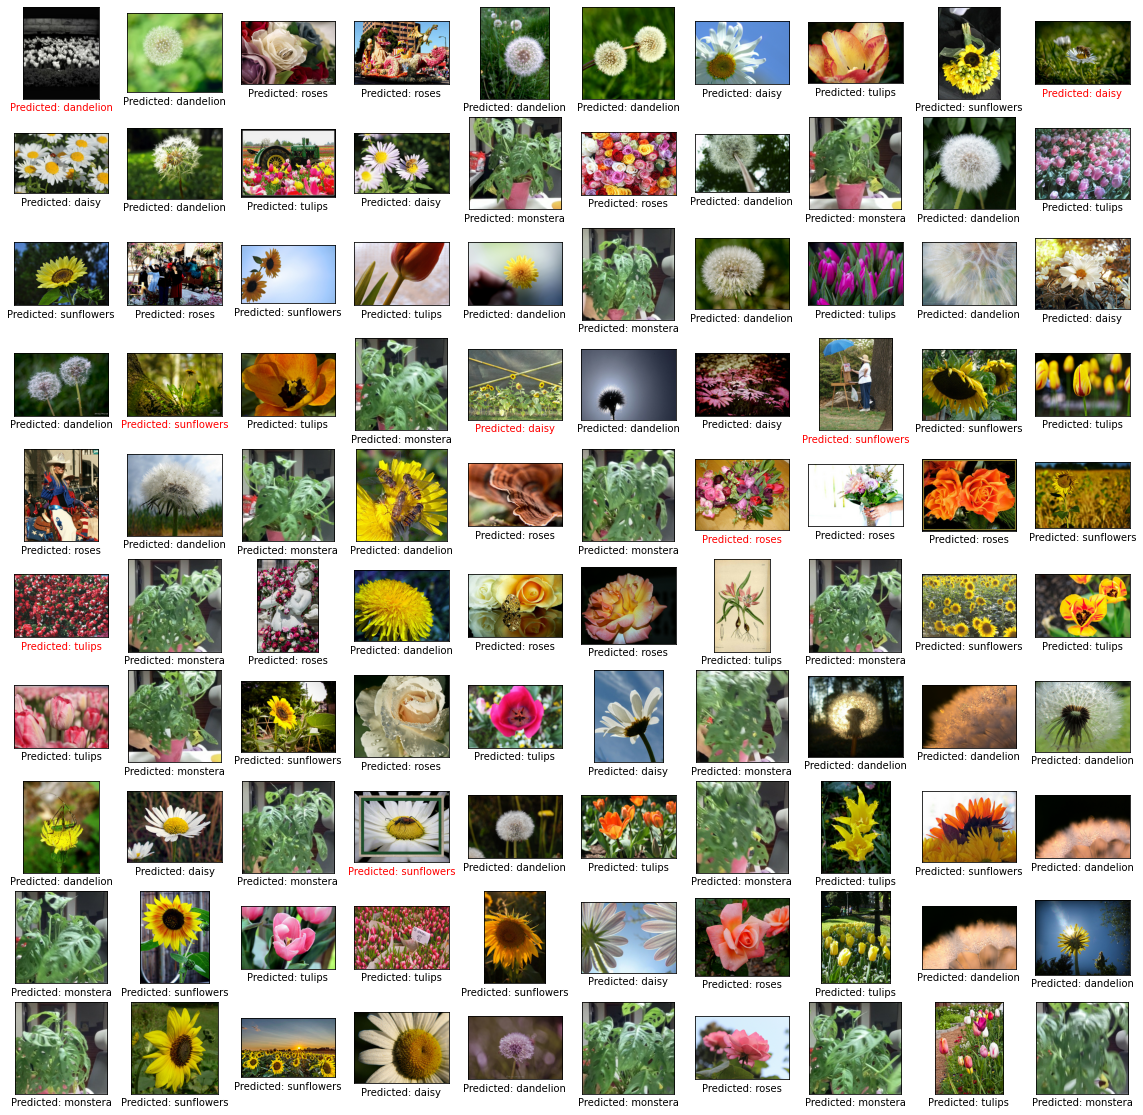

In [29]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()